In [6]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# load business.json
filepath = '../../yelp_dataset'

business = []
for l in open(filepath+"/business.json", encoding="utf8").readlines():
    business.append(json.loads(l))
df_business = pd.DataFrame.from_records(business)


In [10]:
# load data from previous preprocessing/EDA
filepath = '../'

df_restaurant_tips = pd.read_json(filepath+"restaurant_tips.json", encoding="utf8")

In [11]:
# Filter businesses that are only in the 'Restaurant' category
def check_for_rest(row):
    category = row['categories']
    if category:
        tokens = category.split(', ')
        return 'Restaurants' in tokens
    return False

df_business['is_restaurant'] = df_business.apply(check_for_rest, axis=1)

food_businesses = df_business[df_business['is_restaurant'] == True]

# Get the unique IDs for all the businesses that are resturaunts
restaurant_ids  = set(food_businesses['business_id'].unique())

print('Total Unique ID count:',len(restaurant_ids))

Total Unique ID count: 59371


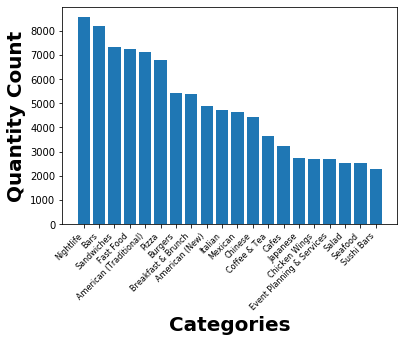

In [12]:
categories_series = food_businesses['categories']

cuisine_counts = {}
for _, categories in categories_series.iteritems():
    tokens = categories.split(', ')
    for category in tokens:
        if category == 'Restaurants'or category == 'Food':
            do = 'nothing' 
        elif category in cuisine_counts:
            cuisine_counts[category] += 1
        else:
            cuisine_counts[category] = 1

sorted_cuisine_counts = {k: v for k, v in sorted(cuisine_counts.items(), key=lambda item: item[1])}

top_20 = dict(list(sorted_cuisine_counts.items())[-20:]) 

x = list(top_20.keys())
x.reverse()
x = np.array(x)
y = list(top_20.values())
y.reverse()
y = np.array(y)


fig, ax = plt.subplots()
plt.bar(x, y)
plt.xticks(x, x, color='black', rotation=45, fontsize='8', horizontalalignment='right')
plt.xlabel("Categories", fontweight='bold', fontsize='20')
plt.ylabel("Quantity Count", fontweight='bold', fontsize='20')

plt.show()

In [13]:
# Modifying DF['categories'] to make filtering more efficient
# def split_category(row):
#     return row['categories'].split(',  ')

# food_businesses['categories'] = food_businesses.apply(split_category, axis=1)

In [14]:
# CUISINES WE WILL EXPLORE:
# Fast Food, American (Traditional), American (New), Italian, Mexican, Chinese, Japanese
def is_fast_food(row):
    category = row['categories']
    if category:
        tokens = category.split(', ')
        return 'Fast Food' in tokens
    return False

def is_american_traditional(row):
    category = row['categories']
    if category:
        tokens = category.split(', ')
        return 'American (Traditional)' in tokens
    return False

def is_american_new(row):
    category = row['categories']
    if category:
        tokens = category.split(', ')
        return 'American (New)' in tokens
    return False

# Fast Food
food_businesses['is_fast_food'] = food_businesses.apply(is_fast_food, axis=1)
df_fast_food = food_businesses[food_businesses['is_fast_food'] == True]

# American (Traditional)
food_businesses['is_american_t'] = food_businesses.apply(is_american_traditional, axis=1)
df_american_t = food_businesses[food_businesses['is_american_t'] == True]

# American (New)
food_businesses['is_american_n'] = food_businesses.apply(is_american_new, axis=1)
df_american_n = food_businesses[food_businesses['is_american_n'] == True]

/Users/leannahue/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/leannahue/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/leannahue/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [15]:
# get tips for Fast Food mapped to business_id
fast_food_ids = set(df_fast_food.business_id.unique())
american_t_ids = set(df_american_t.business_id.unique())
american_n_ids = set(df_american_n.business_id.unique())

# group tips

cuisine_tips_fast_food = df_restaurant_tips[df_restaurant_tips['business_id'].isin(fast_food_ids)]
cuisine_tips_american_t = df_restaurant_tips[df_restaurant_tips['business_id'].isin(american_t_ids)]
cuisine_tips_american_n = df_restaurant_tips[df_restaurant_tips['business_id'].isin(american_n_ids)]


In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

def get_sentiment(sentence):
    dic = analyser.polarity_scores(sentence)
    # dic -> {'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'compound': -0.5423}
    # for some reason only allows dictionary return type
    return dic

def get_positive_sentiment(row):
    sentence = row['text']
    dic = get_sentiment(sentence)
    return dic['pos'] #score is normalized between 0-1

In [24]:
# Find sentiment analysis for each tip
cuisine_tips_fast_food['text_sentiment'] = cuisine_tips_fast_food.apply(get_positive_sentiment, axis=1)
cuisine_tips_american_t['text_sentiment'] = cuisine_tips_american_t.apply(get_positive_sentiment, axis=1)
cuisine_tips_american_n['text_sentiment'] = cuisine_tips_american_n.apply(get_positive_sentiment, axis=1)

/Users/leannahue/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/leannahue/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/leannahue/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [25]:
#seperate into meal times
breakfast_times = set([5,6,7,8,9,10])
lunch_times = set([11,12,13,14,15,16])
dinner_time = set([17,18,19,20,21,22])

#fast food tips
fast_food_tips_breakfast = cuisine_tips_fast_food[cuisine_tips_fast_food['local_hour'].isin(breakfast_times)]
fast_food_tips_lunch = cuisine_tips_fast_food[cuisine_tips_fast_food['local_hour'].isin(lunch_times)]
fast_food_tips_dinner = cuisine_tips_fast_food[cuisine_tips_fast_food['local_hour'].isin(dinner_time)]

#american traditional tips
american_t_tips_breakfast = cuisine_tips_american_t[cuisine_tips_american_t['local_hour'].isin(breakfast_times)]
american_t_tips_lunch = cuisine_tips_american_t[cuisine_tips_american_t['local_hour'].isin(lunch_times)]
american_t_tips_dinner = cuisine_tips_american_t[cuisine_tips_american_t['local_hour'].isin(dinner_time)]

#american new tips
american_n_tips_breakfast = cuisine_tips_american_n[cuisine_tips_american_n['local_hour'].isin(breakfast_times)]
american_n_tips_lunch = cuisine_tips_american_n[cuisine_tips_american_n['local_hour'].isin(lunch_times)]
american_n_tips_dinner = cuisine_tips_american_n[cuisine_tips_american_n['local_hour'].isin(dinner_time)]


In [33]:
# print(df_restaurant_tips)

Index(['user_id', 'business_id', 'text', 'date', 'compliment_count',
       'local_hour', 'text_sentiment'],
      dtype='object')


In [59]:
def find_avg_tip_sentiment(row, df_tips):
    business_id = row['business_id']
    tips_with_this_business = df_tips[df_tips['business_id'] == business_id]
    return tips_with_this_business['text_sentiment'].mean()

In [62]:
# Find average sentiment for each business separated by meal times

# Fast food businesses
fast_food_businesses_breakfast_sentiment = pd.DataFrame({'business_id': list(fast_food_tips_breakfast['business_id'].unique())})
fast_food_businesses_breakfast_sentiment['avg_tip_sentiment'] = \
    fast_food_businesses_breakfast_sentiment.apply(lambda row: find_avg_tip_sentiment(row, fast_food_tips_breakfast), axis=1)

fast_food_businesses_lunch_sentiment = pd.DataFrame({'business_id': list(fast_food_tips_lunch['business_id'].unique())})
fast_food_businesses_lunch_sentiment['avg_tip_sentiment'] = \
    fast_food_businesses_lunch_sentiment.apply(lambda row: find_avg_tip_sentiment(row, fast_food_tips_lunch), axis=1)

fast_food_businesses_dinner_sentiment = pd.DataFrame({'business_id': list(fast_food_tips_dinner['business_id'].unique())})
fast_food_businesses_dinner_sentiment['avg_tip_sentiment'] = \
    fast_food_businesses_dinner_sentiment.apply(lambda row: find_avg_tip_sentiment(row, fast_food_tips_dinner), axis=1)

# American traditional businesses
american_t_businesses_breakfast_sentiment = pd.DataFrame({'business_id': list(american_t_tips_breakfast['business_id'].unique())})
american_t_businesses_breakfast_sentiment['avg_tip_sentiment'] = \
    american_t_businesses_breakfast_sentiment.apply(lambda row: find_avg_tip_sentiment(row, american_t_tips_breakfast), axis=1)

american_t_businesses_lunch_sentiment = pd.DataFrame({'business_id': list(american_t_tips_lunch['business_id'].unique())})
american_t_businesses_lunch_sentiment['avg_tip_sentiment'] = \
    american_t_businesses_lunch_sentiment.apply(lambda row: find_avg_tip_sentiment(row, american_t_tips_lunch), axis=1)

american_t_businesses_dinner_sentiment = pd.DataFrame({'business_id': list(american_t_tips_dinner['business_id'].unique())})
american_t_businesses_dinner_sentiment['avg_tip_sentiment'] = \
    american_t_businesses_dinner_sentiment.apply(lambda row: find_avg_tip_sentiment(row, american_t_tips_dinner), axis=1)

# American new businesses
american_n_businesses_breakfast_sentiment = pd.DataFrame({'business_id': list(american_n_tips_breakfast['business_id'].unique())})
american_n_businesses_breakfast_sentiment['avg_tip_sentiment'] = \
    american_n_businesses_breakfast_sentiment.apply(lambda row: find_avg_tip_sentiment(row, american_n_tips_breakfast), axis=1)

american_n_businesses_lunch_sentiment = pd.DataFrame({'business_id': list(american_n_tips_lunch['business_id'].unique())})
american_n_businesses_lunch_sentiment['avg_tip_sentiment'] = \
    american_n_businesses_lunch_sentiment.apply(lambda row: find_avg_tip_sentiment(row, american_n_tips_lunch), axis=1)

american_n_businesses_dinner_sentiment = pd.DataFrame({'business_id': list(american_n_tips_dinner['business_id'].unique())})
american_n_businesses_dinner_sentiment['avg_tip_sentiment'] = \
    american_n_businesses_dinner_sentiment.apply(lambda row: find_avg_tip_sentiment(row, american_n_tips_dinner), axis=1)


In [29]:
# Find average sentiment for each meal time and cuisine

#fast food tips
fast_food_breakfast_avg_sentiment = fast_food_tips_breakfast['text_sentiment'].mean()
fast_food_lunch_avg_sentiment = fast_food_tips_lunch['text_sentiment'].mean()
fast_food_dinner_avg_sentiment = fast_food_tips_dinner['text_sentiment'].mean()
print('Fast Food Average Sentiment')
print('Breakfast', fast_food_breakfast_avg_sentiment)
print('Lunch', fast_food_lunch_avg_sentiment)
print('Dinner', fast_food_dinner_avg_sentiment, '\n')

#american traditional tips
american_t_breakfast_avg_sentiment = american_t_tips_breakfast['text_sentiment'].mean()
american_t_lunch_avg_sentiment = american_t_tips_lunch['text_sentiment'].mean()
american_t_dinner_avg_sentiment = american_t_tips_dinner['text_sentiment'].mean()
print('American(Traditional) Average Sentiment')
print('Breakfast', american_t_breakfast_avg_sentiment)
print('Lunch', american_t_lunch_avg_sentiment)
print('Dinner', american_t_dinner_avg_sentiment, '\n')

#american new tips
american_n_breakfast_avg_sentiment = american_n_tips_breakfast['text_sentiment'].mean()
american_n_lunch_avg_sentiment = american_n_tips_lunch['text_sentiment'].mean()
american_n_dinner_avg_sentiment = american_n_tips_dinner['text_sentiment'].mean()
print('American (New) Average Sentiment')
print('Breakfast', american_n_breakfast_avg_sentiment)
print('Lunch', american_n_lunch_avg_sentiment)
print('Dinner', american_n_dinner_avg_sentiment)


Fast Food Average Sentiment
Breakfast 0.2213416063426405
Lunch 0.2443311774930272
Dinner 0.23666857515244616 

American(Traditional) Average Sentiment
Breakfast 0.2885007468259895
Lunch 0.2877473850913377
Dinner 0.2789951294708015 

American (New) Average Sentiment
Breakfast 0.28987180729563233
Lunch 0.29474464157522307
Dinner 0.2924089559172432
